In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    print(dirname)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input
/kaggle/input/cats-and-dogs-image-classification
/kaggle/input/cats-and-dogs-image-classification/test
/kaggle/input/cats-and-dogs-image-classification/test/dogs
/kaggle/input/cats-and-dogs-image-classification/test/cats
/kaggle/input/cats-and-dogs-image-classification/train
/kaggle/input/cats-and-dogs-image-classification/train/dogs
/kaggle/input/cats-and-dogs-image-classification/train/cats


In [2]:
import torchvision
from torchvision.datasets import ImageFolder
import torch

In [3]:
dataset = ImageFolder('/kaggle/input/cats-and-dogs-image-classification/train')

In [4]:
dataset.classes

['cats', 'dogs']

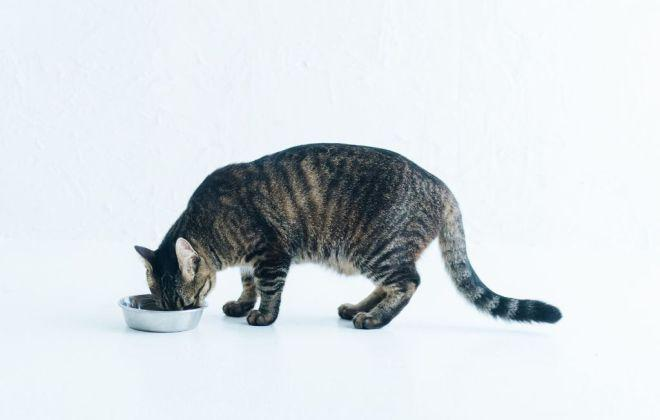

In [5]:
from IPython.display import display

display(dataset[200][0])

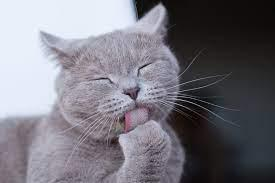

In [6]:
display(dataset[1][0])

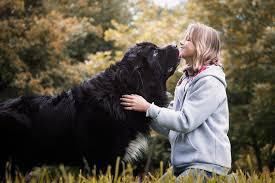

In [7]:
display(dataset[500][0])

In [8]:
len(dataset)

557

In [9]:
import torchvision.transforms as transforms
transform = transforms.Compose([transforms.Resize((205,205)),
                                transforms.RandomVerticalFlip(),
                                transforms.RandomHorizontalFlip(),
                                transforms.Pad(25),
                                transforms.ToTensor()])

In [10]:
train_dataset = ImageFolder('/kaggle/input/cats-and-dogs-image-classification/train', transform = transform)

Calculate mean and standerd deviation to normalize the tensors

In [11]:
train_dataset[0][0].shape

torch.Size([3, 255, 255])

In [12]:
torch.mean(train_dataset[0][0],dim = (1,2))

tensor([0.3546, 0.3322, 0.3067])

In [13]:
torch.concat((train_dataset[0][0],train_dataset[1][0]), dim = 1 ).shape

torch.Size([3, 510, 255])

In [14]:
torch_concatinated = torch.concat([data[0] for data in train_dataset], dim = 1)

In [15]:
torch_concatinated.shape

torch.Size([3, 142035, 255])

In [16]:
mean = torch.mean(torch_concatinated, dim = (1,2))

In [17]:
mean

tensor([0.3797, 0.3613, 0.3228])

In [18]:
std_dev =torch.std(torch_concatinated, dim = (1,2))

In [19]:
additional_transform = transforms.Compose([
    transforms.Normalize(mean, std_dev)
])

train_dataset.transform.transforms.append(additional_transform)

In [20]:
train_dataset[0][0]

tensor([[[-1.0415, -1.0415, -1.0415,  ..., -1.0415, -1.0415, -1.0415],
         [-1.0415, -1.0415, -1.0415,  ..., -1.0415, -1.0415, -1.0415],
         [-1.0415, -1.0415, -1.0415,  ..., -1.0415, -1.0415, -1.0415],
         ...,
         [-1.0415, -1.0415, -1.0415,  ..., -1.0415, -1.0415, -1.0415],
         [-1.0415, -1.0415, -1.0415,  ..., -1.0415, -1.0415, -1.0415],
         [-1.0415, -1.0415, -1.0415,  ..., -1.0415, -1.0415, -1.0415]],

        [[-1.0239, -1.0239, -1.0239,  ..., -1.0239, -1.0239, -1.0239],
         [-1.0239, -1.0239, -1.0239,  ..., -1.0239, -1.0239, -1.0239],
         [-1.0239, -1.0239, -1.0239,  ..., -1.0239, -1.0239, -1.0239],
         ...,
         [-1.0239, -1.0239, -1.0239,  ..., -1.0239, -1.0239, -1.0239],
         [-1.0239, -1.0239, -1.0239,  ..., -1.0239, -1.0239, -1.0239],
         [-1.0239, -1.0239, -1.0239,  ..., -1.0239, -1.0239, -1.0239]],

        [[-0.9383, -0.9383, -0.9383,  ..., -0.9383, -0.9383, -0.9383],
         [-0.9383, -0.9383, -0.9383,  ..., -0

In [21]:
import matplotlib.pyplot as plt

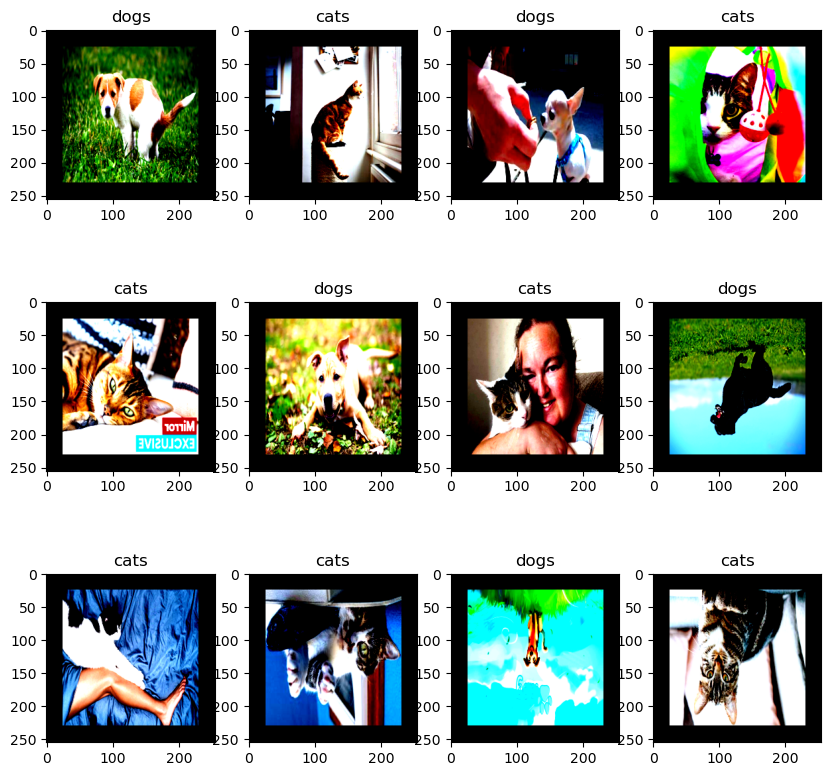

In [22]:
fig = plt.figure(figsize=(10, 10))
columns = 4
rows = 3
for i in range(1, columns * rows + 1):
    idx = torch.randint(len(train_dataset), size=(1,)).item()
    img, label = train_dataset[idx]
    class_name = train_dataset.classes[label]
    fig.add_subplot(rows, columns, i)
    plt.title(class_name)
    plt.imshow(img.permute(1, 2, 0))
plt.show()

Create DataLoader

In [23]:
test_dataset = ImageFolder('/kaggle/input/cats-and-dogs-image-classification/test', transform = transforms.Compose([
    transform,
    additional_transform
]))

In [24]:
test_dataset

Dataset ImageFolder
    Number of datapoints: 140
    Root location: /kaggle/input/cats-and-dogs-image-classification/test
    StandardTransform
Transform: Compose(
               Compose(
               Resize(size=(205, 205), interpolation=bilinear, max_size=None, antialias=warn)
               RandomVerticalFlip(p=0.5)
               RandomHorizontalFlip(p=0.5)
               Pad(padding=25, fill=0, padding_mode=constant)
               ToTensor()
               Compose(
               Normalize(mean=tensor([0.3797, 0.3613, 0.3228]), std=tensor([0.3646, 0.3529, 0.3441]))
           )
           )
               Compose(
               Normalize(mean=tensor([0.3797, 0.3613, 0.3228]), std=tensor([0.3646, 0.3529, 0.3441]))
           )
           )

In [25]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=8, shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=8, shuffle=True, num_workers=2)

Define Model